<a href="https://colab.research.google.com/github/saiful1604008/Thesis/blob/main/Final_thesis_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
import os 
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [3]:
data_dir = "/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/"
num_classes = 2

In [4]:
datagen = ImageDataGenerator(
    rescale = 1.0/255,
    validation_split = 0.20
)

train_gen = datagen.flow_from_directory(
    directory= data_dir,
    target_size = (125,125),
    batch_size = 30,
    color_mode = 'rgb',
    shuffle = True,
    subset = 'training',
    class_mode = 'binary'
)

valid_gen = datagen.flow_from_directory(
    directory= data_dir,
    target_size = (125,125),
    batch_size = 30,
    color_mode = 'rgb',
    shuffle = False,
    subset = 'validation',
    class_mode = 'binary'

)

Found 812 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [5]:
input_shape = train_gen.image_shape
input_shape

(125, 125, 3)

In [21]:
model = Sequential([
                    Conv2D(16,(6,6),
                            strides=2,
                            activation="relu",
                            padding='same',
                            input_shape=input_shape),
                    MaxPooling2D(pool_size = 2,strides=1),
                    Dropout(0.5),
                    Conv2D(32,(3,3),
                           strides=1,
                           padding="same",
                           activation="relu"),
                    MaxPooling2D(pool_size = 2,strides = 1),
                    Dropout(0.5),
                    Conv2D(64,(3,3),
                           strides=1,
                           padding="same",
                           activation="relu"),
                    MaxPooling2D(pool_size = 2,strides = 1),
                    Dropout(0.5),
                    
                    Flatten(),
                    Dense(256,activation = 'relu'),
                    Dropout(0.5),
                    #Dense(512,activation = 'relu'),
                    #Dropout(0.5),
                    Dense(2,activation = 'softmax')
                    
])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 63, 63, 16)        1744      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 62, 62, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 61, 61, 32)       

In [23]:
callback_list = EarlyStopping(monitor = 'val_loss',
                              patience = 20,
                              restore_best_weights=True)

In [24]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.0005),
              metrics = ['accuracy'])

In [25]:
Epoch = 200
batchSize = 32

history = model.fit(train_gen,
                    batch_size = batchSize,
                    epochs=Epoch,
                    callbacks=[callback_list],
                    validation_data=valid_gen,
                    verbose = 1)

Epoch 1/200
28/28 [==============================] - 46s 2s/step - loss: 4.7691 - accuracy: 0.5936 - val_loss: 0.6895 - val_accuracy: 0.5025
Epoch 2/200
28/28 [==============================] - 44s 2s/step - loss: 0.4456 - accuracy: 0.8485 - val_loss: 0.4918 - val_accuracy: 0.7811
Epoch 3/200
28/28 [==============================] - 43s 2s/step - loss: 0.2868 - accuracy: 0.9039 - val_loss: 0.4623 - val_accuracy: 0.8408
Epoch 4/200
28/28 [==============================] - 43s 2s/step - loss: 0.2476 - accuracy: 0.9200 - val_loss: 0.4679 - val_accuracy: 0.8408
Epoch 5/200
28/28 [==============================] - 44s 2s/step - loss: 0.2125 - accuracy: 0.9273 - val_loss: 0.4734 - val_accuracy: 0.8109
Epoch 6/200
28/28 [==============================] - 47s 2s/step - loss: 0.1926 - accuracy: 0.9236 - val_loss: 0.4274 - val_accuracy: 0.8358
Epoch 7/200
28/28 [==============================] - 49s 2s/step - loss: 0.1530 - accuracy: 0.9384 - val_loss: 0.4347 - val_accuracy: 0.7761
Epoch 8/200
2

In [26]:
model.evaluate(valid_gen)

7/7 [==============================] - 3s 343ms/step - loss: 0.2750 - accuracy: 0.8657


[0.27497145533561707, 0.8656716346740723]

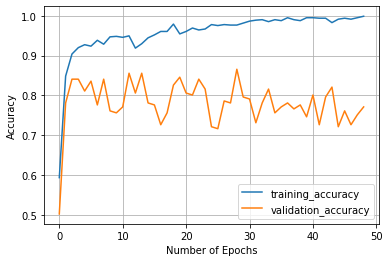

In [27]:
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

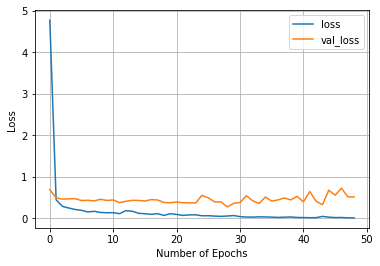

In [28]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [29]:
from sklearn.metrics import classification_report, confusion_matrix

target_names = []

for key in train_gen.class_indices:
    target_names.append(key)


y_pred = model.predict_generator(valid_gen)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(valid_gen.classes, y_pred)
print (cm)

print('\n')

print('Classification Report')
print(classification_report(valid_gen.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  if __name__ == '__main__':


Confusion Matrix
[[86 15]
 [12 88]]


Classification Report
              precision    recall  f1-score   support

      Normal       0.88      0.85      0.86       101
     Seizure       0.85      0.88      0.87       100

    accuracy                           0.87       201
   macro avg       0.87      0.87      0.87       201
weighted avg       0.87      0.87      0.87       201



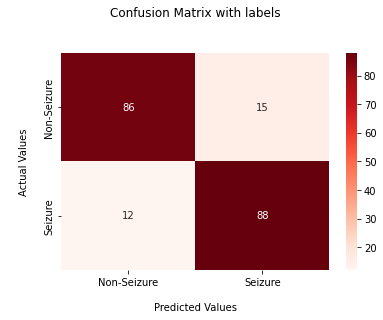

In [62]:
ax = sns.heatmap(cm, annot=True, cmap = 'Reds')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('\nActual Values\n');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Seizure','Seizure'])
ax.yaxis.set_ticklabels(['Non-Seizure','Seizure'])

## Display the visualization of the Confusion Matrix.
plt.show()

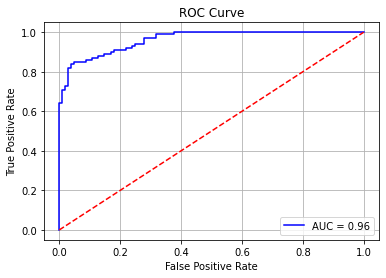

In [31]:
import sklearn.metrics as metrics
y_pred_keras = model.predict(valid_gen)
preds = y_pred_keras[:,1]
fpr_keras, tpr_keras, thresholds_keras = metrics.roc_curve(valid_gen.classes, preds)
roc_auc = metrics.auc(fpr_keras, tpr_keras)

plt.title('ROC Curve')
plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.show()

In [33]:
from tensorflow.keras.preprocessing import image

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [51]:
def predictImage(file_name):
    image1 = image.load_img(file_name,target_size=(125,125))
    plt.imshow(image1)
    Y = image.img_to_array(image1)
    X = np.expand_dims(Y,axis=0)
    value = model.predict(X)
    v = np.argmax(value)
    print(v)
    if v == 1: 
        plt.xlabel("Seizure",fontsize= 20)
    elif v == 0:
        
        plt.xlabel("Non-Seizure",fontsize= 20)

1


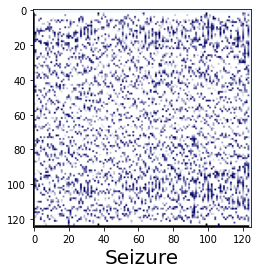

In [52]:
predictImage('/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/Seizure/313.PNG')

0


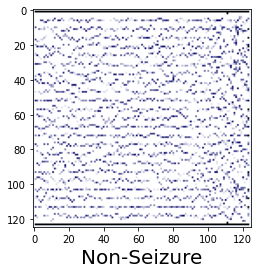

In [53]:
predictImage('/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/Normal/273.PNG')